# Econometrics 1 

## TD 3 - 02/10/2024

TA: Pedro Vergara Merino ([pedro.vergaramerino@ensae.fr](mailto:pedro.vergaramerino@ensae.fr), office 4081) 

In [2]:
rm(list=ls()) #Clean workspace

if(!require(car)) install.packages("car")
if(!require(estimatr)) install.packages("estimatr")

set.seed(100) #Select a random seed in order to replicate results


Le chargement a nécessité le package : car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“aucun package nommé ‘car’ n'est trouvé”
installation des dépendances ‘nloptr’, ‘pbkrtest’, ‘lme4’


Warning message in install.packages("car"):
“l'installation du package ‘nloptr’ a eu un statut de sortie non nul”
Warning message in install.packages("car"):
“l'installation du package ‘lme4’ a eu un statut de sortie non nul”
Warning message in install.packages("car"):
“l'installation du package ‘pbkrtest’ a eu un statut de sortie non nul”
Warning message in install.packages("car"):
“l'installation du package ‘car’ a eu un statut de sortie non nul”
Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé

Le chargement a nécessité le package : estimatr



1. Simulate data from the model, then estimate the linear regression of `Y` on `D` and a constant for samples of different sizes: `n = 20`, `n = 100`, `n = 10^3`, `n = 10^5`. What do you observe for $(\hat{\beta}_{1,n}, \hat{\beta}_{2,n})$? Which property of the OLS estimator is being illustrated here?


In [3]:
#Generate the data and perform regressions for every sample size
for (n in c(20,100,10^3,10^5))
{
  cat("Sample size : ", n, "\n") 
  #1. We generate one random sample
  D=rnorm(n) #Generate D from a standard normal distribution
  U=runif(n, min=-1, max=1) #Generate U from a continuous uniform distribution
  Y=1+D+(1+D)*U 
  
  #2. We estimate the model using OLS
  model=lm(Y~D)
  print(coef(summary(model)))
  cat("\n")
}

Sample size :  20 
             Estimate Std. Error  t value     Pr(>|t|)
(Intercept) 0.9372599  0.1654121 5.666210 2.248477e-05
D           0.7174188  0.2334259 3.073432 6.548789e-03

Sample size :  100 
            Estimate Std. Error  t value     Pr(>|t|)
(Intercept) 1.132583 0.07729969 14.65185 1.973875e-26
D           1.223718 0.07434799 16.45932 5.777361e-30

Sample size :  1000 
            Estimate Std. Error  t value      Pr(>|t|)
(Intercept) 1.015859 0.02595191 39.14391 7.922591e-204
D           1.015729 0.02494657 40.71617 2.491594e-214

Sample size :  1e+05 
             Estimate  Std. Error  t value Pr(>|t|)
(Intercept) 0.9976015 0.002570755 388.0577        0
D           1.0000378 0.002574305 388.4690        0



We remark that the $(\hat{\beta}_{1,n}, \hat{\beta}_{2,n})$ estimated converge towards $(\hat{\beta}_{01}, \hat{\beta}_{02})$ = (1,1)

2. Same question when we draw $U$ from a Cauchy distribution, that is, with a density with respect to Lebesgue’s measure equal to 

$$
f: \mathbb{R} \rightarrow \mathbb{R}^+, \quad f(x) := \frac{1}{\pi(1+x^2)}.
$$


In [1]:
for (n in c(20,100,10^3,10^5))
{
  cat("Sample size : ", n, "\n") 
  #1. We generate a random sample
  D=rnorm(n)  # We draw D from a standard normal distribution
  U=rcauchy(n) # We draw U from a Cauchy distribution
  Y=1+D+(1+D)*U
  
  #2. We estimate the model and print results
  model=lm(Y~D)
  print(coef(summary(model)))
  cat("\n")
}

Sample size :  20 
             Estimate Std. Error   t value   Pr(>|t|)
(Intercept) 1.8327305   1.009783 1.8149740 0.08622811
D           0.3793339   1.145683 0.3310984 0.74439355

Sample size :  100 
            Estimate Std. Error   t value  Pr(>|t|)
(Intercept) 1.102496   1.493486 0.7382032 0.4621551
D           1.287419   1.441669 0.8930058 0.3740417

Sample size :  1000 
              Estimate Std. Error    t value  Pr(>|t|)
(Intercept) -0.6535561  0.9169905 -0.7127185 0.4761866
D           -0.9186437  0.9233071 -0.9949492 0.3200021

Sample size :  1e+05 
             Estimate Std. Error    t value  Pr(>|t|)
(Intercept) 22.103808   20.58665  1.0736960 0.2829616
D           -4.056669   20.64552 -0.1964915 0.8442259



There is no convergence here because expectation of Cauchy variable doesn't exist, then we cannot apply the prop 5, chapter 1. We don't have convergencve in probability.

3. Henceforth, we take $ U \sim \text{Uniform} $ again. Draw $ S = 10^3 $ samples of size $ n = 20 $ and store the obtained OLS estimates of the slope $ \hat{\beta}_{2,n}^{(1)}, \ldots, \hat{\beta}_{2,n}^{(S)} $, then plot the empirical density of those estimates. Do the same for samples of size $ n = 1,000 $, and compare the results. What do you remark? Which property of the OLS estimator do we illustrate here?



In [2]:
My_Simul <- function(n)
{
  D=rnorm(n)
  U=runif(n, min=-1, max=1)
  Y=1+D+(1+D)*U
  model=lm(Y~D)
  
  #Coefficients associated with D
  beta_2=coef(model)["D"] 
  
  return(beta_2)
}

In [3]:
simul_20=replicate(1000, My_Simul(20))
simul_20[c(1:5)]

#We run this function for n=1000, 1000 times
simul_1000=replicate(1000, My_Simul(1000))


D         D         D         D         D 
0.9137425 0.8598903 1.1824794 0.9555204 0.7861930

In [4]:
#We plot the densities
Title_beta2=quote(paste("Density of ", widehat(beta)[2]))
par(xpd=F)

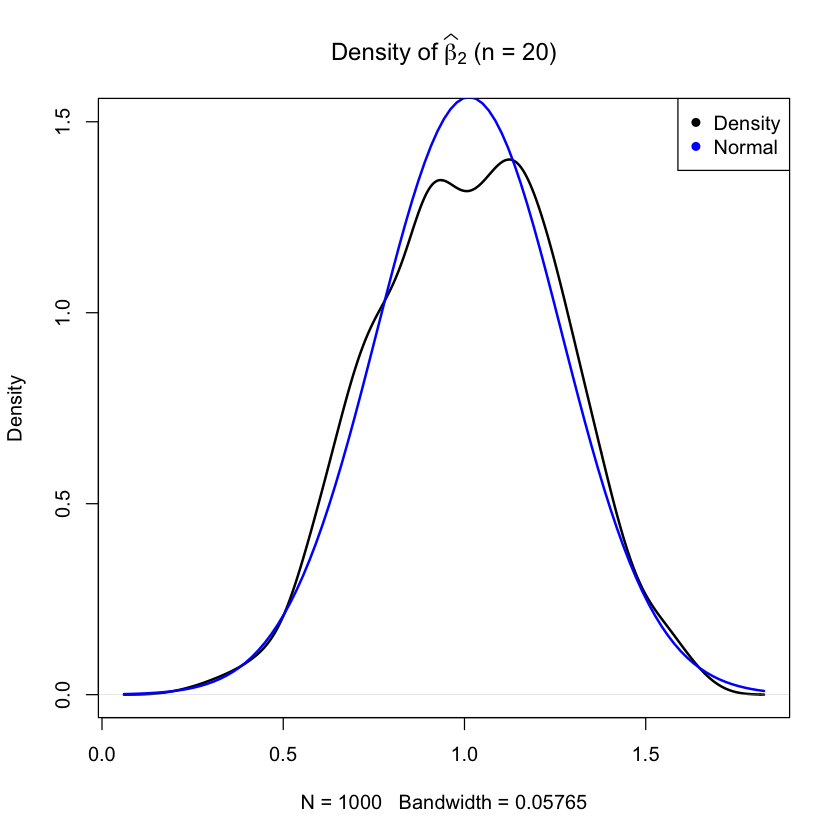

In [5]:
#n=20
plot(density(simul_20), main=substitute(title*N, list(title=Title_beta2, N=" (n = 20)")),ylim=c(0,max(density(simul_20)$y)+0.1) ,lwd=2)
curve(dnorm(x, mean=mean(simul_20), sd=sd(simul_20)), col="blue", add=TRUE, lwd=2) #Comparison with normal distribution
legend(x="topright", legend=c("Density","Normal"), col=c("black","blue"), pch=16)

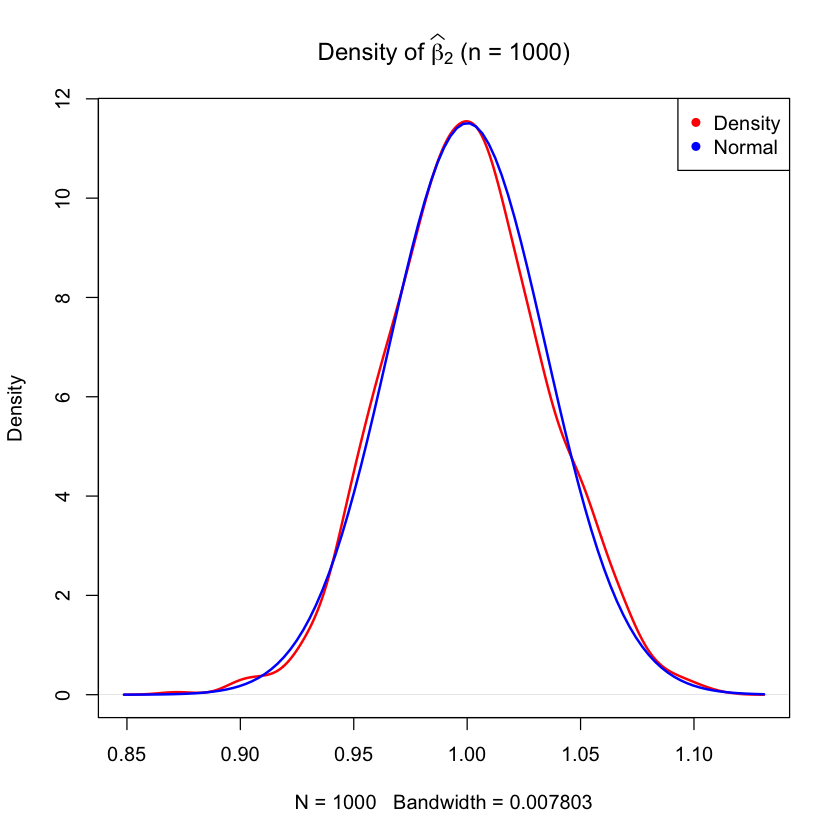

In [6]:
#n=1000
plot(density(simul_1000), main=substitute(title*N, list(title=Title_beta2, N=" (n = 1000)")), lwd=2,col="red")
curve(dnorm(x, mean=mean(simul_1000), sd=sd(simul_1000)), col="blue", add=TRUE, lwd=2) #Comparison with normal distribution
legend(x="topright", legend=c("Density","Normal"), col=c("red","blue"), pch=16)

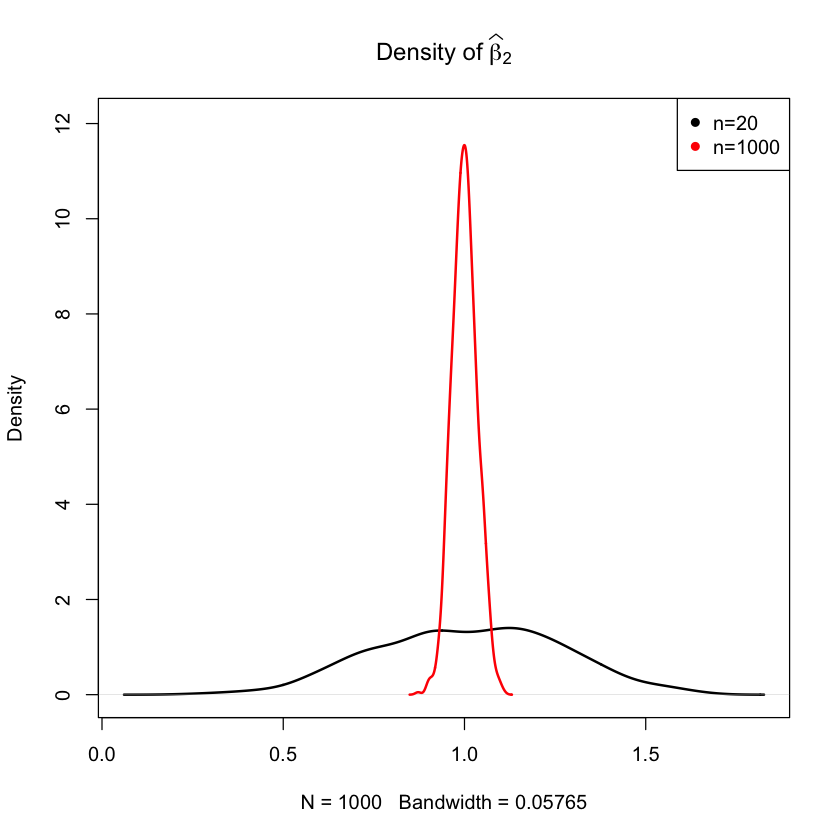

In [7]:
#Facilitate comparison by putting both graphs together
plot(density(simul_20), main=Title_beta2, ylim=c(0,max(density(simul_1000)$y)+0.5), lwd=2)
lines(density(simul_1000), col="red", lwd=2)
legend(x="topright", legend=c("n=20","n=1000"), col=c("black","red"), pch=16)



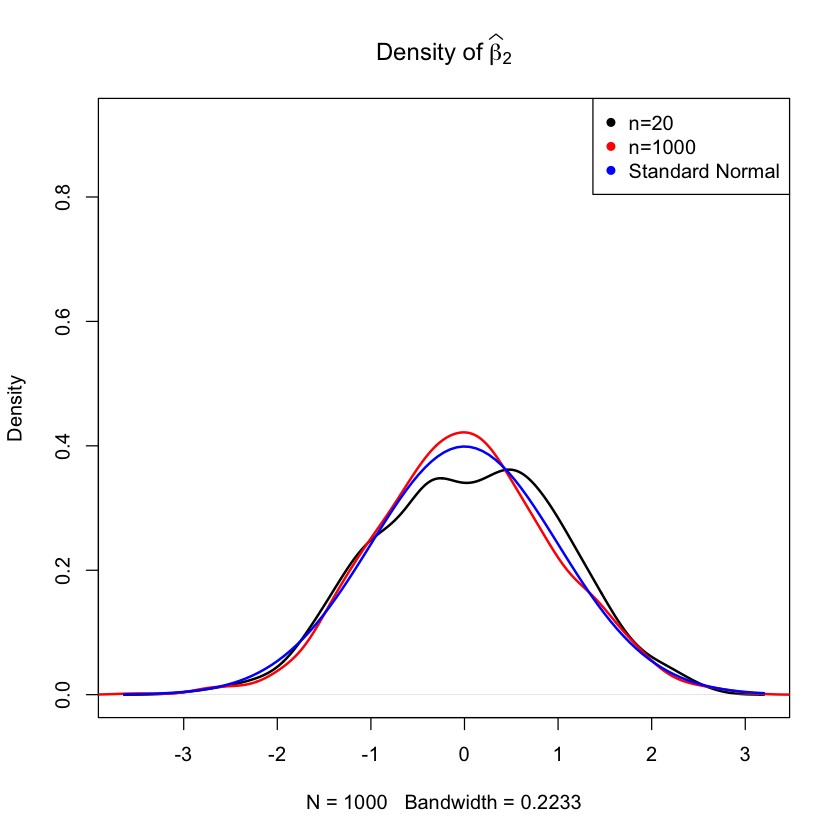

In [8]:
#BONUS: Comparison to a standard normal (The asymptotic variance is equal to 4/3)
simul_20_sd<-(simul_20-1)*sqrt(20/(4/3))
simul_1000_sd<-(simul_1000-1)*sqrt(1000/(4/3))
plot(density(simul_20_sd), main=Title_beta2, ylim=c(0,max(density(simul_1000_sd)$y)+0.5), lwd=2)
lines(density(simul_1000_sd), col="red", lwd=2)
curve(dnorm(x, mean=0, sd=1), col="blue", add=TRUE, lwd=2) # 
legend(x="topright", legend=c("n=20","n=1000","Standard Normal"), col=c("black","red","blue"), pch=16)

In question 3, we show that the theorem 1, chapter 2 actually works.

4.In this question, we assume $ \gamma_0^2 = 0 $. Fix a sample size $ n $. Compare the empirical density of $ \hat{\beta}_{2,n} $ when $ D \sim N(0,1) $ and when $ D \sim N(0,4) $. Likewise, when $ D \sim N(0,1) $, compare the two cases: $ a = 1 $ and $ a = 2 $. In particular, comment on the variation of $ V(\hat{\beta}_{2,n}) $, the variance of $ \hat{\beta}_{2,n} $. Did you expect those results?

In [10]:
#We define the function where we can choose n, var_D
My_Simul_2 <- function(n=1000, var_D=1, a=1)
{
  D=rnorm(n, 0, sqrt(var_D))
  U=runif(n, min=-a, max=a)
  Y=1+D+U
  model=lm(Y~D)
  beta_2=coef(model)["D"]
  return(beta_2)
}

#1) We consider Var_D=1 and var_D=4
res_var1 =replicate(1000,My_Simul_2(var_D=1))
res_var4 =replicate(1000,My_Simul_2(var_D=4))


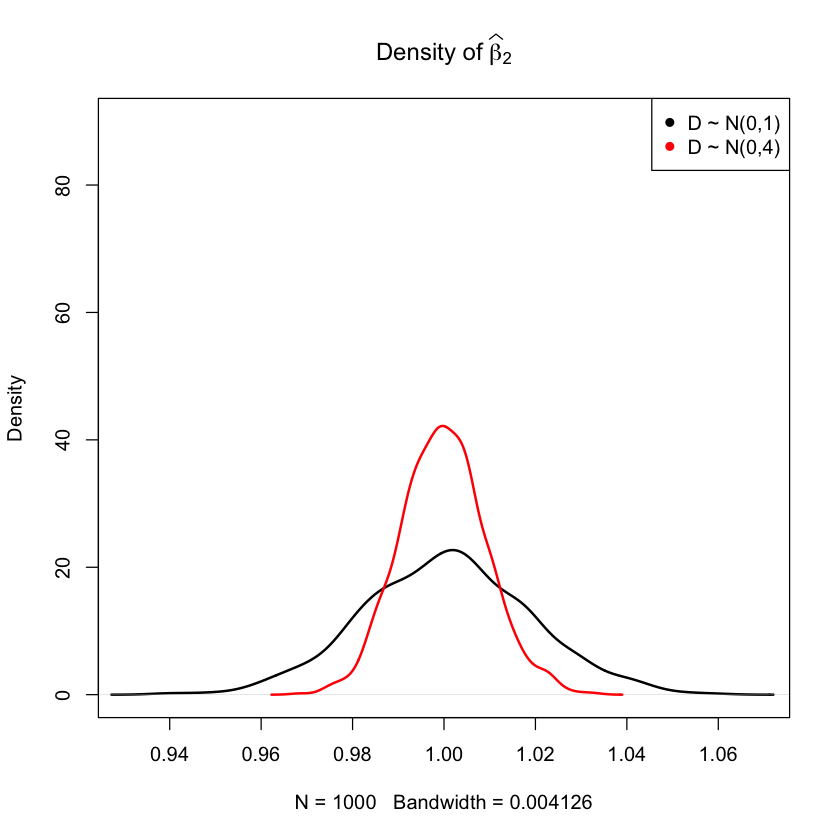

In [11]:
#We plot the densities
plot(density(res_var1),xlim=c(0.93,1.07), ylim=c(0,90), lwd=2,
     main=Title_beta2)
lines(density(res_var4), col="red", lwd=2)
legend(x="topright", legend=c("D ~ N(0,1)","D ~ N(0,4)"), col=c("black","red"), pch=16)


Variance of estimator with var(D)=1 et a=1 : 0.0003331038 
Variance of estimator with c var(D)=4        : 8.756465e-05 
Variance of estimator with  a=2             : 0.001287601

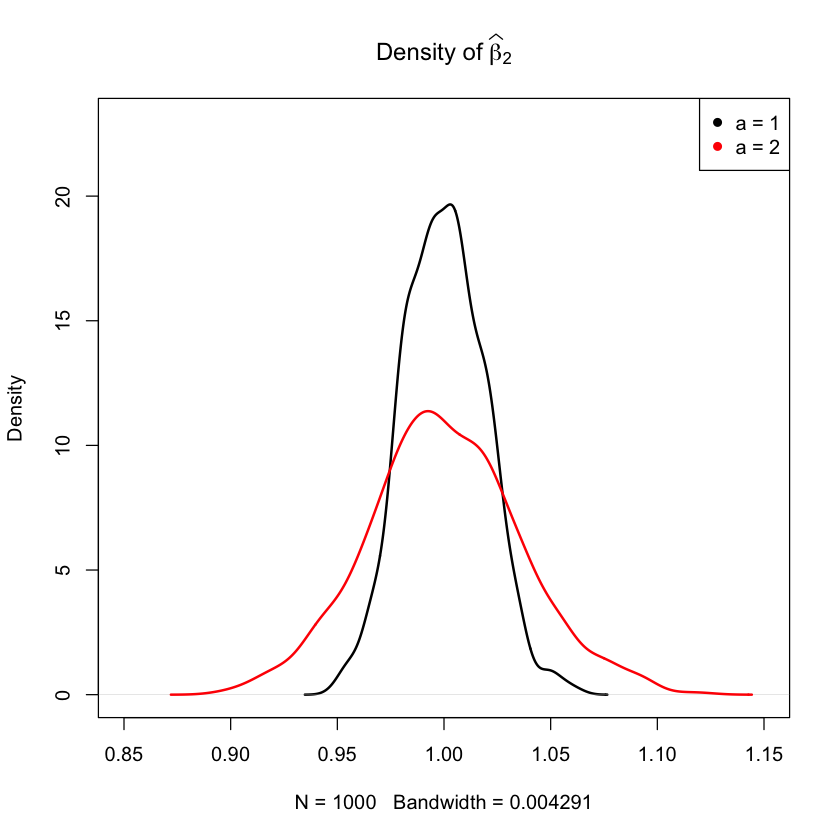

In [12]:
#2)We consider a=1 and a=2
res_a1 = replicate(1000,My_Simul_2(a=1))
res_a2 = replicate(1000,My_Simul_2(a=2))

  
plot(density(res_a1),xlim=c(0.85,1.15), ylim=c(0,23), main=Title_beta2, lwd=2)
lines(density(res_a2), col="red", lwd=2)
legend(x="topright", legend=c("a = 1","a = 2"), col=c("black","red"), pch=16)

cat("Variance of estimator with var(D)=1 et a=1 :"  , var(res_var1),
    "\nVariance of estimator with c var(D)=4        :", var(res_var4),
    "\nVariance of estimator with  a=2             :", var(res_a2))


When we increase a, we increase the variance of U, then the variance of $\beta$

### 5. We consider the simple bilateral test of the null hypothesis $ H_0 : \delta_0^2 = 1 $ against the alternative $ H_1 : \delta_0^2 \neq 1$ . To do so, we examine two different test statistics:

- On the one hand, the one based on the estimator of the asymptotic variance robust to heteroscedasticity,
- On the other, the one based on the estimator of the asymptotic variance assuming homoscedasticity.

For each of $S$ samples of respective sizes $n = 20$ and $n = 1,000$, compute and store the p-values for these two test statistics.

For both tests and both sample sizes, what is the probability of rejecting the null hypothesis for a nominal level $\alpha = 1\%$? Same question at 5% and 10%. Did you expect the results?